To cluster retrieved subset of images and to filter the locations to map it back to weather data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('imgs_metadata_count.csv')

print(df.shape)
df.head(5)

(124484, 7)


,timestamp,url,latitude,longitude,device_id,md5,count
0,2022-03-09T23:59:52+08:00,https://images.data.gov.sg/api/traffic-images/...,1.295313,103.871146,1001,f1730fe528197ef204cbfdea31bcc618,0.0
1,2022-03-09T23:59:52+08:00,https://images.data.gov.sg/api/traffic-images/...,1.319541,103.878563,1002,8750875e660ce8094af27ca1544ca183,0.0
2,2022-03-09T23:59:52+08:00,https://images.data.gov.sg/api/traffic-images/...,1.323957,103.872858,1003,f90e8645319764308f2da335eec4afdc,0.0
3,2022-03-09T23:59:52+08:00,https://images.data.gov.sg/api/traffic-images/...,1.319536,103.875067,1004,50c20c962a18726686ebb390932487f1,4.0
4,2022-03-09T23:59:52+08:00,https://images.data.gov.sg/api/traffic-images/...,1.363520,103.905394,1005,d4fb57d3ccd30c6b061eeb78463f8d9f,0.0


In [105]:
# Variable with the Longitude and Latitude
X=df.loc[:,['url','latitude','longitude']]
X.head(10)

,url,latitude,longitude
0,https://images.data.gov.sg/api/traffic-images/...,1.295313,103.871146
1,https://images.data.gov.sg/api/traffic-images/...,1.319541,103.878563
2,https://images.data.gov.sg/api/traffic-images/...,1.323957,103.872858
3,https://images.data.gov.sg/api/traffic-images/...,1.319536,103.875067
4,https://images.data.gov.sg/api/traffic-images/...,1.363520,103.905394
5,https://images.data.gov.sg/api/traffic-images/...,1.357099,103.902042
6,https://images.data.gov.sg/api/traffic-images/...,1.274144,103.851317
7,https://images.data.gov.sg/api/traffic-images/...,1.271351,103.861828
8,https://images.data.gov.sg/api/traffic-images/...,1.270664,103.856978
9,https://images.data.gov.sg/api/traffic-images/...,1.294099,103.876056


In [106]:
## Clustering Algorithm ##

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) 
# Compute k-means 
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ 

print(centers)
# Coordinates of cluster 
labels = kmeans.predict(X[X.columns[1:3]]) 
# Labels of each point
X.head(10)


####Centers####

# [[  1.32542784 103.77758339] (0)
#  [  1.30263091 103.86012605] -- North west (1)
#  [  1.34467507 103.67252747] (2)
#  [  1.40648304 103.79647934] (3)
#  [  1.35157856 103.93402669]] -- North (4)

[[  1.30492465 103.8600845 ]
 [  1.32542784 103.77758339]
 [  1.34467507 103.67252747]
 [  1.35157856 103.93402669]
 [  1.40818446 103.79300949]]


,url,latitude,longitude,cluster_label
0,https://images.data.gov.sg/api/traffic-images/...,1.295313,103.871146,0
1,https://images.data.gov.sg/api/traffic-images/...,1.319541,103.878563,0
2,https://images.data.gov.sg/api/traffic-images/...,1.323957,103.872858,0
3,https://images.data.gov.sg/api/traffic-images/...,1.319536,103.875067,0
4,https://images.data.gov.sg/api/traffic-images/...,1.363520,103.905394,3
5,https://images.data.gov.sg/api/traffic-images/...,1.357099,103.902042,3
6,https://images.data.gov.sg/api/traffic-images/...,1.274144,103.851317,0
7,https://images.data.gov.sg/api/traffic-images/...,1.271351,103.861828,0
8,https://images.data.gov.sg/api/traffic-images/...,1.270664,103.856978,0
9,https://images.data.gov.sg/api/traffic-images/...,1.294099,103.876056,0


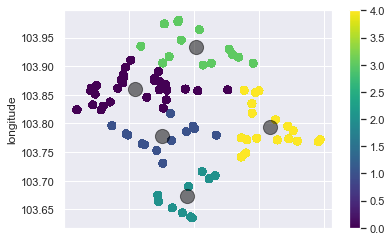

In [107]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [108]:
X = X[['cluster_label']]
print(X.shape)
X.head(5)
X_list = X['cluster_label'].tolist()
print(len(X_list))

(124484, 1)
124484


In [109]:
df['cluster_label'] = X_list
df.head(5)
df.shape  #(124484, 8)

(124484, 8)

In [110]:
df.to_csv ('clustered_data.csv', index=None, header = True)

In [111]:
#### Woodlands area ####
temp = [4]
clustered_data_wood = df[df.cluster_label.isin(temp)]
clustered_data_wood.shape 

(25755, 8)

In [112]:
#### Tuas area ####
temp = [1]
clustered_data_tuas = df[df.cluster_label.isin(temp)]
clustered_data_tuas.shape 

(18586, 8)

In [113]:
clustered_data_tuas['timestamp'] = clustered_data_tuas['timestamp'].str.replace('T',' ')
clustered_data_tuas['timestamp'] = clustered_data_tuas['timestamp'].str.replace('\+08:00',' ')

print(clustered_data_tuas.head(5))

# clustered_data_tuas.to_csv('temp_tuas_cls.csv', sep='\t')

               timestamp                                                url  \
22  2022-03-09 23:59:52   https://images.data.gov.sg/api/traffic-images/...   
24  2022-03-09 23:59:52   https://images.data.gov.sg/api/traffic-images/...   
36  2022-03-09 23:59:52   https://images.data.gov.sg/api/traffic-images/...   
40  2022-03-09 23:59:52   https://images.data.gov.sg/api/traffic-images/...   
41  2022-03-09 23:59:52   https://images.data.gov.sg/api/traffic-images/...   

    latitude   longitude  device_id                               md5  count  \
22  1.350478  103.791034       2703  84b8bd8c32ecb73d9203ba8429cf91a3    4.0   
24  1.367286  103.779470       2705  9cc1f7659b419d620196d863594ef3bb    6.0   
36  1.287100  103.796330       4701  cc6da4ebdc9625a0e8ef82869c422925    3.0   
40  1.326180  103.730280       4705  2ce7ae8de72b875f3d5473316ff49d82    0.0   
41  1.297920  103.782050       4706  fd2b3455cea1042bcd3f356f1453c983    1.0   

    cluster_label  
22              1  
24  

In [114]:
clustered_data_tuas_sort = clustered_data_tuas.sort_values(by=['timestamp'], ascending=True)
clustered_data_tuas_sort.to_csv('temp_tuas_cls.csv', sep='\t')

In [115]:
temp_grp = clustered_data_tuas_sort.groupby(['timestamp']).sum()[["count"]]
temp_grp.shape

(223, 1)

In [116]:
temp_grp.to_csv('grp_tuas.csv', sep='\t')

In [117]:
print(temp_grp)

                      count
timestamp                  
2022-03-09 23:59:52   222.0
2022-03-10 00:05:52    93.0
2022-03-10 00:08:52   132.0
2022-03-10 00:14:12   186.0
2022-03-10 00:20:13   110.0
...                     ...
2022-03-10 23:38:49     0.0
2022-03-10 23:44:29     0.0
2022-03-10 23:49:09     0.0
2022-03-10 23:54:10     0.0
2022-03-10 23:58:10     0.0

[223 rows x 1 columns]


In [3]:
tuas = pd.read_csv('grp_tuas.csv', sep='\t', parse_dates=['timestamp'],index_col=0)
tuas = tuas.iloc[1: , :]  #Removing previous day data

In [4]:
print(tuas)

                     count
timestamp                 
2022-03-10 00:05:52   93.0
2022-03-10 00:08:52  132.0
2022-03-10 00:14:12  186.0
2022-03-10 00:20:13  110.0
2022-03-10 00:25:33   93.0
...                    ...
2022-03-10 23:38:49    0.0
2022-03-10 23:44:29    0.0
2022-03-10 23:49:09    0.0
2022-03-10 23:54:10    0.0
2022-03-10 23:58:10    0.0

[222 rows x 1 columns]


In [5]:
indexNames = tuas[tuas['count'] == 0.0].index
tuas.drop(indexNames , inplace=True)
print(tuas.shape)

(63, 1)


In [6]:
print(tuas)
tuas.to_csv('temp_lagless_tuas.csv', sep='\t')

                     count
timestamp                 
2022-03-10 00:05:52   93.0
2022-03-10 00:08:52  132.0
2022-03-10 00:14:12  186.0
2022-03-10 00:20:13  110.0
2022-03-10 00:25:33   93.0
...                    ...
2022-03-10 04:53:43  114.0
2022-03-10 04:59:23   70.0
2022-03-10 05:04:24   70.0
2022-03-10 05:09:24   70.0
2022-03-10 05:14:24   84.0

[63 rows x 1 columns]


In [7]:
tuas.reset_index(inplace = True, drop = True)
print(tuas)
tuas.to_csv('tuas_count_input.csv', sep='\t')

    count
0    93.0
1   132.0
2   186.0
3   110.0
4    93.0
..    ...
58  114.0
59   70.0
60   70.0
61   70.0
62   84.0

[63 rows x 1 columns]


In [73]:
df = pd.read_csv('tuas_count_input.csv', sep='\t', index_col=0)
# print(df)
d = {'count': 'sum'}
res = df.groupby(df.index // 12).agg(d)
print(res)

    count
0  1345.0
1   962.0
2   679.0
3   634.0
4   728.0
5   224.0


In [74]:
vals = res['count'].tolist()
print(vals)

[1345.0, 962.0, 679.0, 634.0, 728.0, 224.0]


In [75]:
data = {'datetime' : pd.date_range(start='3/10/2022',
                                  end='03/13/2022', 
                                  freq='H')}

In [76]:
import numpy as np

df = pd.DataFrame(data, columns = ['datetime'])                              
nan_list = [np.nan] * (len(df)-len(vals))
count_final_input_list = vals+nan_list

In [77]:
df['count'] = count_final_input_list
print(df)

              datetime   count
0  2022-03-10 00:00:00  1345.0
1  2022-03-10 01:00:00   962.0
2  2022-03-10 02:00:00   679.0
3  2022-03-10 03:00:00   634.0
4  2022-03-10 04:00:00   728.0
..                 ...     ...
68 2022-03-12 20:00:00     NaN
69 2022-03-12 21:00:00     NaN
70 2022-03-12 22:00:00     NaN
71 2022-03-12 23:00:00     NaN
72 2022-03-13 00:00:00     NaN

[73 rows x 2 columns]


In [80]:
## To fill empty values; interpolate with mean ##

# final = df.fillna(method='ffill').fillna(method='bfill')
# print (final
#final.to_csv('final_count.csv', sep='\t'))
df['count'] = df['count'].fillna(df['count'].mean())
df['count'] = df['count'].astype(int)
df.drop(df.tail(1).index,inplace=True) # drop last n rows
print(df.tail(5))

              datetime  count
67 2022-03-12 19:00:00    762
68 2022-03-12 20:00:00    762
69 2022-03-12 21:00:00    762
70 2022-03-12 22:00:00    762
71 2022-03-12 23:00:00    762


In [81]:
df.to_csv('count.csv', sep='\t')